In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
data = pd.read_csv('Mall_Customers.csv')

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [14]:
data = data.dropna()

In [16]:
X = data[['Age', 'Annual Income (k$)']]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
inertia = []
silhouette_scores = []

In [22]:
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center
    if n_clusters > 1:
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)

Text(0, 0.5, 'Inertia')

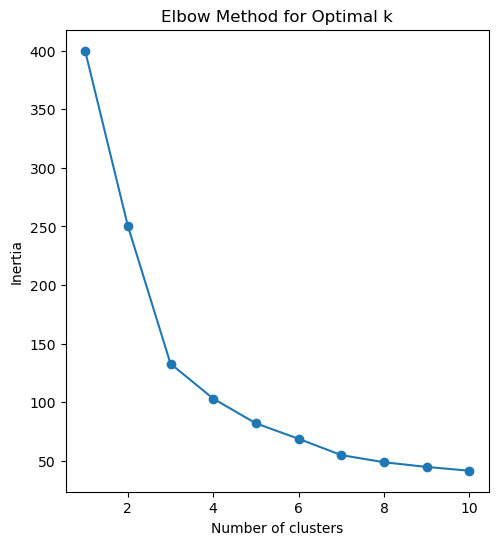

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

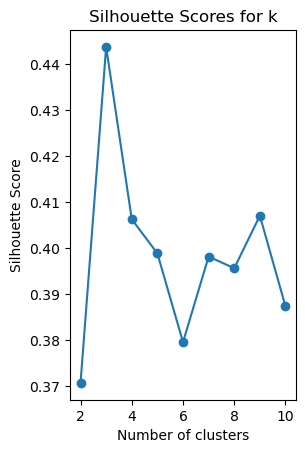

In [26]:
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [28]:
optimal_clusters = 3

In [30]:
kmeans = KMeans(n_clusters=6, random_state=44)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=44)

In [32]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

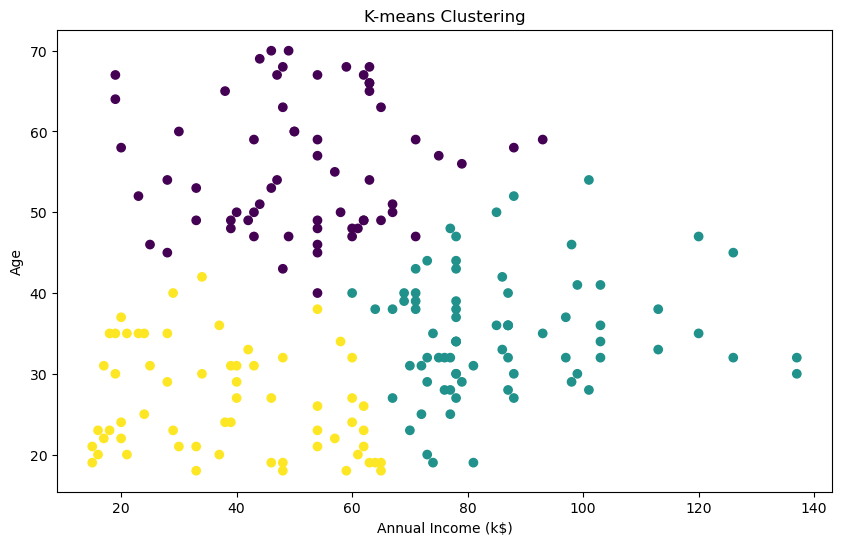

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Age'], c=data['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

In [36]:
final_silhouette_score = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score for final clustering: {final_silhouette_score:.2f}')

Silhouette Score for final clustering: 0.44
